# EDA and Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style='whitegrid')
import matplotlib.ticker as mtick

In [2]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [3]:
telecom_cust = pd.read_csv('../dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telecom_columns = telecom_cust.columns.values
telecom_columns

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

+ 查看缺失值

In [6]:
telecom_cust.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Converting Total Charges to a numerical data type.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

+ 去除缺失数据行

In [8]:
telecom_cust.dropna(inplace=True)
df2 = telecom_cust.iloc[:,1:]
# Churn结果转化为一列，getdummies会自动把他们转化形成两列
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


## Correlation of Churn and other  variables

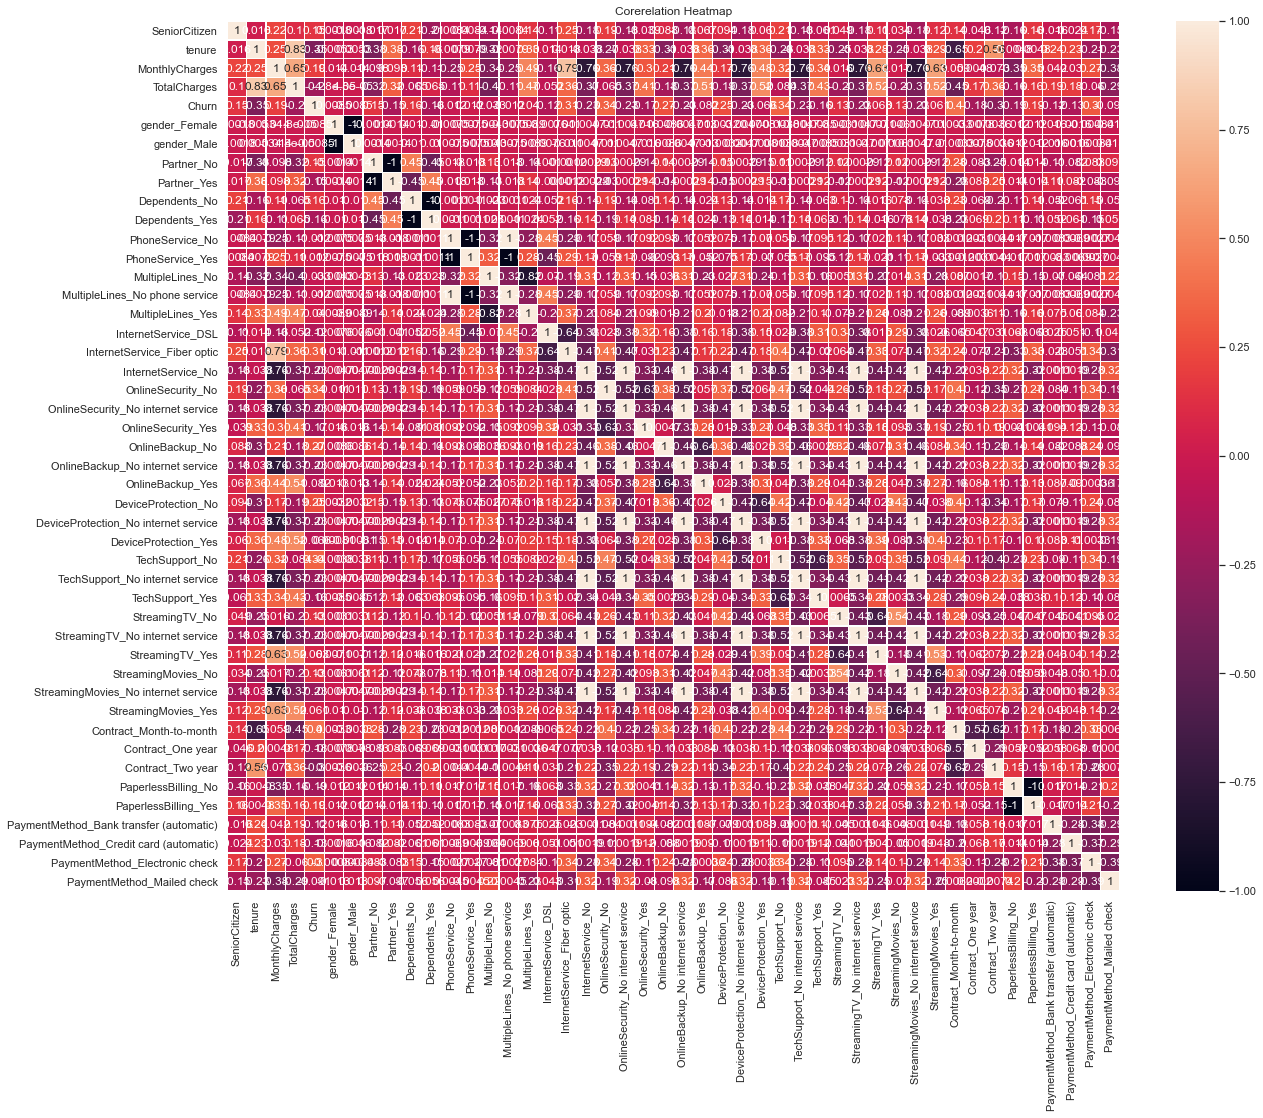

In [9]:
plt.figure(figsize=(20,16))
sns.heatmap(df_dummies.corr(), linewidths=0.2, annot=True)
plt.title('Corerelation Heatmap');

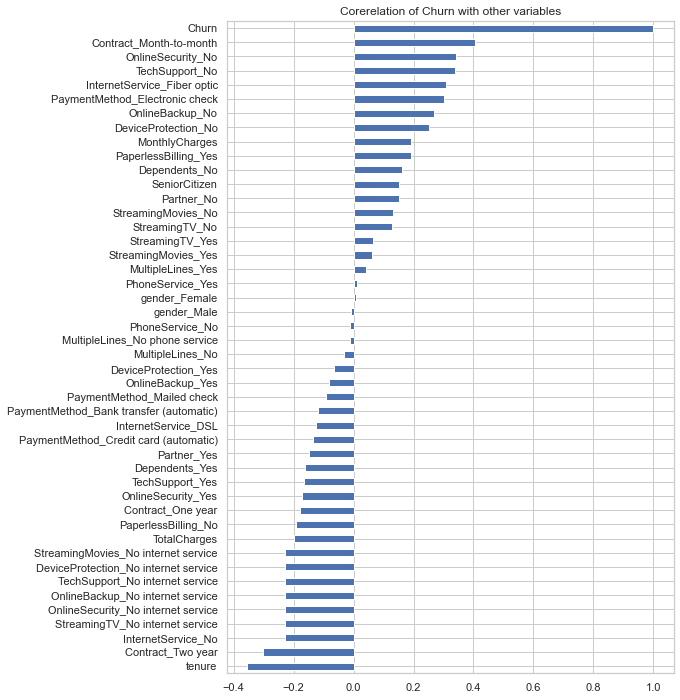

In [10]:
plt.figure(figsize=(8,12))
df_dummies.corr()['Churn'].sort_values(ascending=True).plot(kind='barh')
plt.title('Corerelation of Churn with other variables');
plt.savefig('../charts/Correlation_barhchart.jpg',bbox_inches='tight')

+ 与客户流失呈显著正相关的因素
    + 按月签订合约Contrac_Month-to-month
    + 缺乏网络安全Online-Security-no
    + 没有技术支持TechSupport_no
    + 光纤用户 Fiber_optic
    + 电子支票支付Electronic check
+ 显著负相关
    + tenure 用户使用公司网络服务的月数
    + 两年期合约 Contract_Two Year

# Data Exploration

In [11]:
# 来个最爱的颜色组合
colors = ["#51C1C8", "#E96279", "#44A2D6", "#536D84",
         "#51C1C8", "#E96279", "#44A2D6", "#536D84"]

## 用户群体统计分析
+ 性别，年龄段，是否有伴侣，监护人状态

### 性别分布

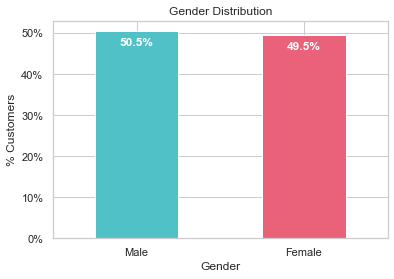

In [12]:
ax = (telecom_cust['gender'].value_counts()*100/len(telecom_cust)).plot(kind='bar',
                                                                       stacked=True,
                                                                       rot=0,
                                                                       color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

totals = [i.get_width() for i in ax.patches]
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

### 是否为退休人员 Senior Citizens

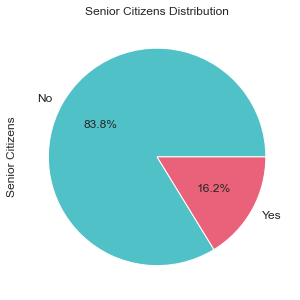

In [13]:
ax = (telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12,colors=colors)                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('Senior Citizens Distribution', fontsize = 12);

### 伴侣和监护人情况 Parter and dependent status

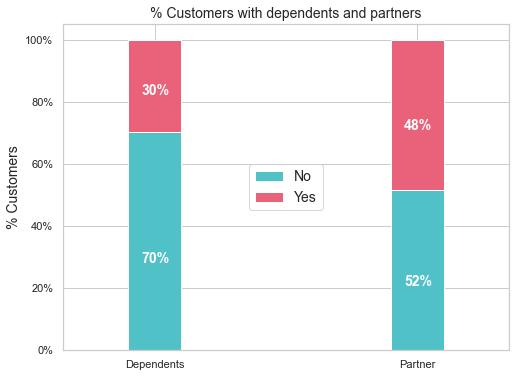

In [14]:
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_cust)
ax = df3.loc[:,'customerID'].plot.bar(stacked=True,color=colors,
                                     figsize=(8,6),rot=0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

## 消费者用户信息

### Tenure 消费者使用公司服务的时间

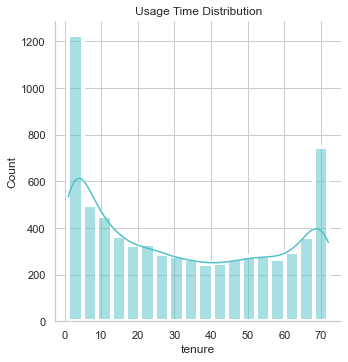

In [74]:
ax = sns.displot(telecom_cust['tenure'],kde=True,
                bins=int(180/10),
                 color=colors[0],
                linewidth=4,)
plt.title('Usage Time Distribution')
plt.savefig('../charts/usage_time_Distribution.jpg',bbox_inches='tight');

### 合同类型 Contracts Type

In [76]:
telecom_cust['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

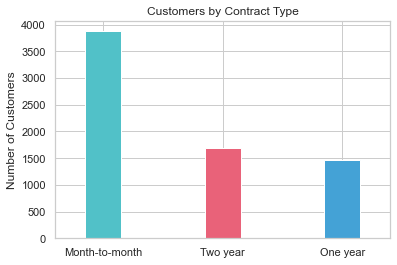

In [75]:
ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3, color=colors)
ax.set_ylabel('Number of Customers')
ax.set_title('Customers by Contract Type');
plt.savefig('../charts/Customers by Contract Type.jpg',bbox_inches='tight');

#### 不同类型的Constracts对应的Tenure
+ 选取更长期的合同的人通常会更愿意使用很长的时间

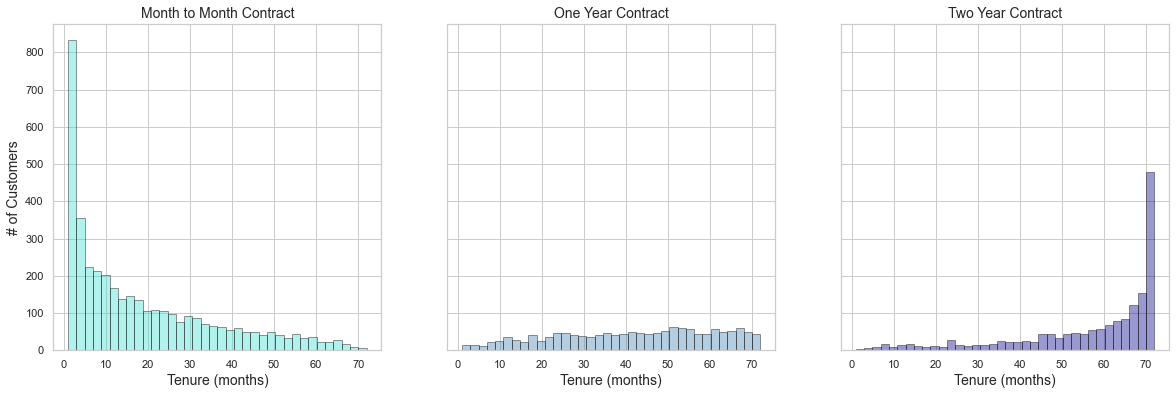

In [80]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers',size=14)
ax.set_xlabel('Tenure (months)',size=14)
ax.set_title('Month to Month Contract',size=14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)',size=14)
ax.set_title('Two Year Contract',size=14)
plt.savefig('../charts/tenure_constract_type.jpg');

## 不同客户使用的服务分布

In [18]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

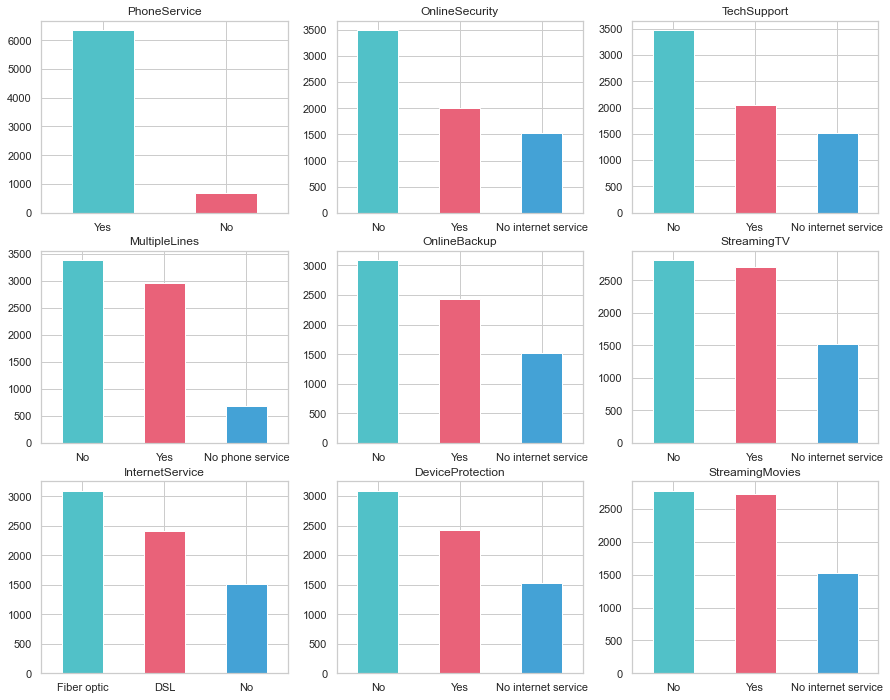

In [19]:
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0,color=colors)

    elif i >=3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color=colors)

    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color=colors)
    ax.set_title(item)
plt.savefig('../charts/Distribution_Services.jpg')

## 月度收费和总收费的关系
+ relation between monthly and total charges

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


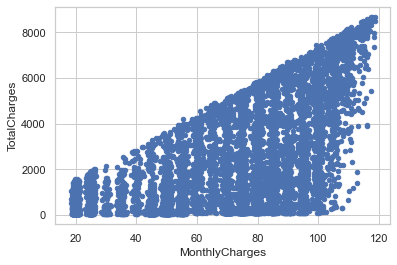

In [20]:
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges',);

## 流失率与其他变量之间的关系

### 流失分布情况

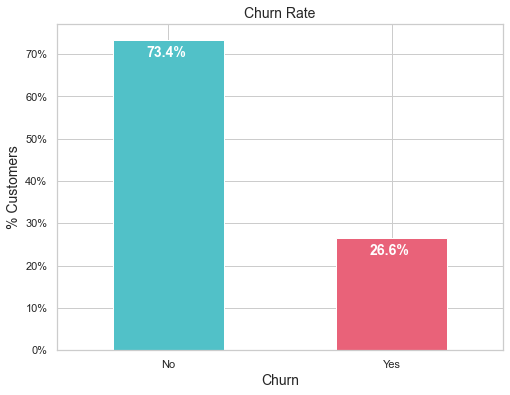

In [21]:
ax = (telecom_cust['Churn'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

### Churn & Tenure 用户使用时间与Churn之间的关系

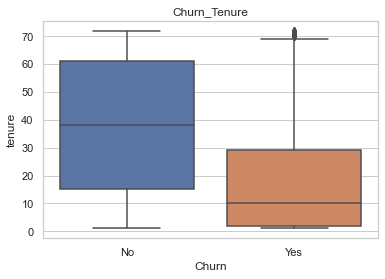

In [91]:
sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure)
plt.title('Churn_Tenure')
plt.savefig('../charts/Churn_Tenure.jpg',bbox_inches='tight');

### Churn & Contract Type

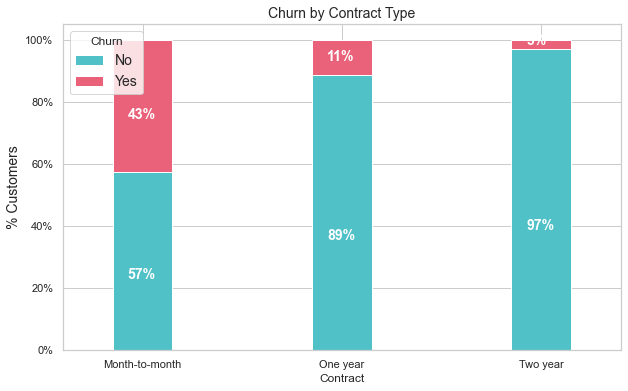

In [23]:
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
    
plt.savefig('../charts/Churn_ContractType.jpg',bbox_inches='tight')

### Churn & Seniority 流失与老年用户的关系
+ 老年用户流失比例几乎是其他用户的两倍

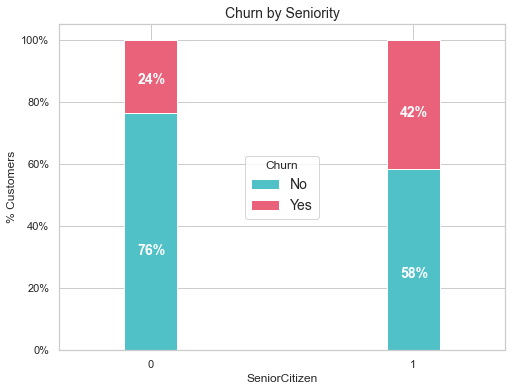

In [24]:
seniority_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)
    
plt.savefig('../charts/Churn_Seniority.jpg',bbox_inches='tight')

### Churn & Monthly Charges
+ 更高的月度收费往往有更高的流失

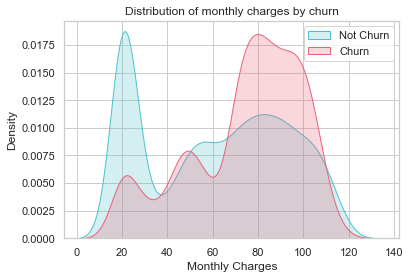

In [25]:
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ],
                color=colors[0], shade = True)
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color=colors[1], shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

plt.savefig('../charts/Churn_MonthlyCharge.jpg',bbox_inches='tight')

### Churn & Total Charges

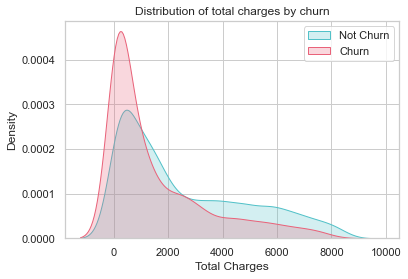

In [26]:
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No') ],
                color=colors[0], shade = True)
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color=colors[1], shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

plt.savefig('../charts/Churn_TotalCharge.jpg',bbox_inches='tight')

# 用户分类

## 按照用户使用服务时间划分

In [92]:
df = telecom_cust.copy()

def time_cut(x):
    if x<=6:
        return 'NewUser_1'
    elif 7<=x<=24:
        return 'NewUser_2'
    elif 25<=x<=50:
        return 'OldUser_1'
    else:
        return 'OldUser_2'

df['User_Category'] = df['tenure'].apply(lambda x:time_cut(x))

### 查看不同类别用户的消费情况

+ 各类别用户总数

In [103]:
df.groupby('User_Category')['customerID'].count()

User_Category
NewUser_1    1470
NewUser_2    1729
OldUser_1    1728
OldUser_2    2105
Name: customerID, dtype: int64

In [135]:
df.groupby(['User_Category','Churn'])['customerID'].count()

User_Category  Churn
NewUser_1      No        686
               Yes       784
NewUser_2      No       1182
               Yes       547
OldUser_1      No       1378
               Yes       350
OldUser_2      No       1917
               Yes       188
Name: customerID, dtype: int64

In [141]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'User_Category'],
      dtype='object')

In [147]:
def time_cut_2(x):
    if x<=6:
        return 1
    elif 7<=x<=24:
        return 2
    elif 25<=x<=50:
        return 3
    else:
        return 4
df['category']=df['tenure'].apply(lambda x:time_cut_2(x))

In [157]:
df_temp['category'].value_counts()

4    2105
2    1729
3    1728
1    1470
Name: category, dtype: int64

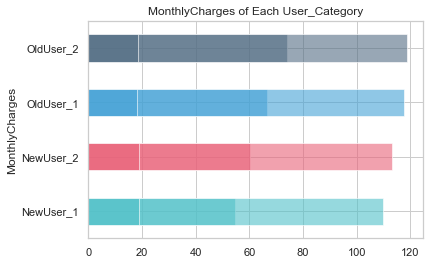

In [194]:
df.groupby('User_Category')['MonthlyCharges'].mean().plot(kind='barh',color=colors,
                                                         xlabel='MonthlyCharges',alpha=0.6,
                                                         title='MonthlyCharges of Each User_Category')
df.groupby('User_Category')['MonthlyCharges'].max().plot(kind='barh',color=colors,
                                                         xlabel='MonthlyCharges',alpha=0.6,
                                                         title='MonthlyCharges of Each User_Category')
df.groupby('User_Category')['MonthlyCharges'].min().plot(kind='barh',color=colors,
                                                         xlabel='MonthlyCharges',alpha=0.6,
                                                         title='MonthlyCharges of Each User_Category')


plt.savefig('../charts/MonthlyCharges_Each_User_Category.jpg',bbox_inches='tight')

查看每类别用户对应的使用服务情况

In [215]:
services = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']

# 基于用户特征做流失群体的聚类
+ 转化为细分的用户群

In [27]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

## 选取特征
+ 抛开用户的个人信息，只针对客户使用的情况
+ 用户使用公司服务的时间长度 tenure
+ 用户使用的服务类别及服务数量
+ 支付方式PaperlessBilling 和 PaymentMethod
+ 支付费用 MonthlyCharges 和 TotalCharges

In [294]:
label_features=['PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
         'Contract','PaperlessBilling','PaymentMethod']
numeric_features=[]

In [295]:
df_cluster = telecom_cust[telecom_cust['Churn']=='Yes']

In [296]:
df_cluster = df_cluster[label_features+numeric_features]

In [297]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 2 to 7041
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PhoneService      1869 non-null   object
 1   MultipleLines     1869 non-null   object
 2   InternetService   1869 non-null   object
 3   OnlineSecurity    1869 non-null   object
 4   OnlineBackup      1869 non-null   object
 5   DeviceProtection  1869 non-null   object
 6   TechSupport       1869 non-null   object
 7   StreamingTV       1869 non-null   object
 8   StreamingMovies   1869 non-null   object
 9   Contract          1869 non-null   object
 10  PaperlessBilling  1869 non-null   object
 11  PaymentMethod     1869 non-null   object
dtypes: object(12)
memory usage: 189.8+ KB


+ 数值型数据标准化

In [298]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


trans_pipeline = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('str', OneHotEncoder(), label_features)
])

user_prepared = trans_pipeline.fit_transform(df_cluster)

In [299]:
str_columns = list(trans_pipeline.named_transformers_['str'].get_feature_names())
num_columns = list(numeric_features)

+ 将转化出来的user_prepared转化为DataFrame

In [300]:
user_prepared_df = pd.DataFrame(user_prepared,columns=(num_columns+str_columns))

+ 聚类
    + 轮廓系数确定簇数

In [301]:
from sklearn.cluster import SpectralClustering,KMeans
from sklearn.metrics import silhouette_score

result=[]
for i in range(2,10):
    user_cluster_model = KMeans(n_clusters=i,random_state=42).fit(user_prepared_df)
    labels = user_cluster_model.labels_
    result.append(silhouette_score(user_prepared_df, labels,metric='euclidean'))

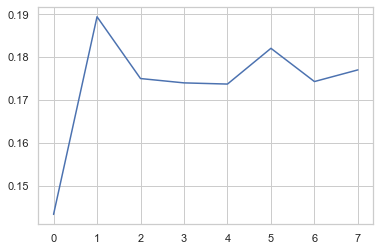

In [302]:
pd.Series(result).plot();

+ 选取簇数 4

In [315]:
user_cluster_model = KMeans(n_clusters=4,random_state=42).fit(user_prepared_df)
labels = user_cluster_model.labels_

In [316]:
user_cluster_result = user_prepared_df.copy(deep=True)
user_cluster_result['Category']=labels

In [317]:
user_cluster_result.head()

,x0_No,x0_Yes,x1_No,x1_No phone service,x1_Yes,x2_DSL,x2_Fiber optic,x2_No,x3_No,x3_No internet service,x3_Yes,x4_No,x4_No internet service,x4_Yes,x5_No,x5_No internet service,x5_Yes,x6_No,x6_No internet service,x6_Yes,x7_No,x7_No internet service,x7_Yes,x8_No,x8_No internet service,x8_Yes,x9_Month-to-month,x9_One year,x9_Two year,x10_No,x10_Yes,x11_Bank transfer (automatic),x11_Credit card (automatic),x11_Electronic check,x11_Mailed check,Category
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1


## EDA聚类的出的结果与其他变量的关系

### 每个类别用户的数量

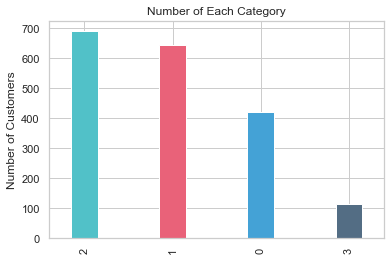

In [322]:
ax = user_cluster_result['Category'].value_counts().plot(kind='bar',
                                                         width=0.3,
                                                        color=colors)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Each Category')
plt.savefig('../charts/numberofeachCategoryKMneas.jpg',bbox_inches='tight');

### 查看每个类别对应的用户信息情况

#### Tenure MonthlyCharges TotalCharges

In [319]:
cluster_result_SC = telecom_cust[telecom_cust['Churn']=='Yes'].copy(deep=True)
cluster_result_SC['Category']=labels

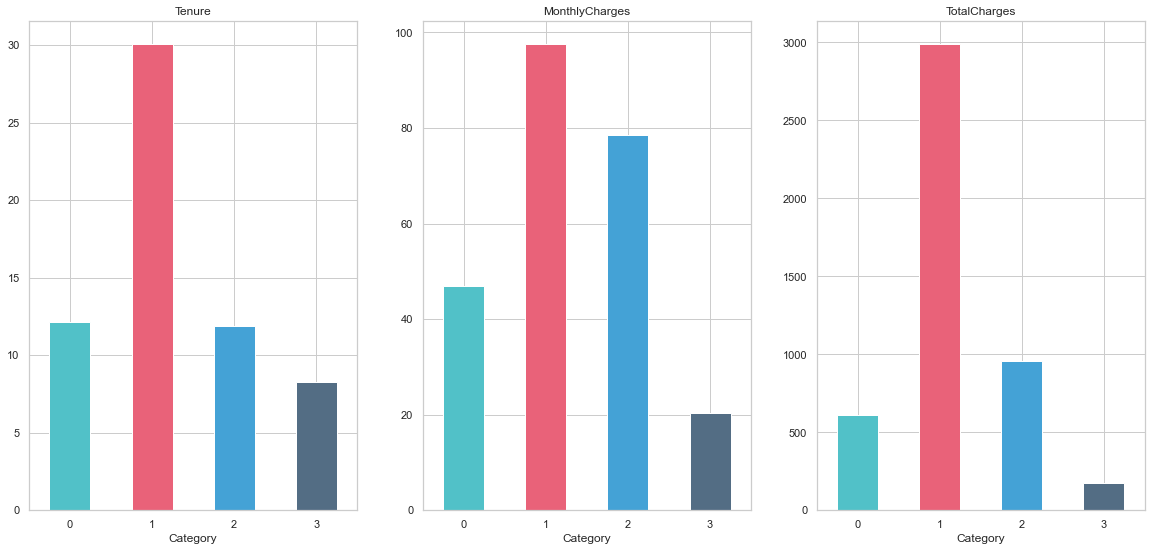

In [320]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,9))
ax = (cluster_result_SC.groupby('Category')['tenure'].mean()).plot(kind='bar',rot=0,color=colors,ax=axes[0],title='Tenure')
ax = cluster_result_SC.groupby('Category')['MonthlyCharges'].mean().plot(kind='bar',rot=0,color=colors,ax=axes[1],title='MonthlyCharges')
ax = cluster_result_SC.groupby('Category')['TotalCharges'].mean().plot(kind='bar',rot=0,color=colors,ax=axes[2],title='TotalCharges')
plt.savefig('../charts/Tenure_MonthlyCharges_TotalCharges_Category.jpg',bbox_inches='tight')

#### 四类客户对公司做出的收入总贡献

In [325]:
cluster_result_SC.groupby('Category')['TotalCharges'].sum()

Category
0     258417.05
1    1923975.50
2     660881.40
3      19652.95
Name: TotalCharges, dtype: float64

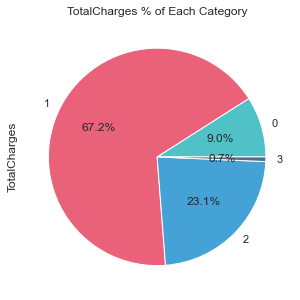

In [326]:
sum_charges = cluster_result_SC['TotalCharges'].sum()
ax = (cluster_result_SC.groupby('Category')['TotalCharges'].sum()/sum_charges*100.0).plot.pie(figsize=(5,5),autopct='%.1f%%',
                                                                                              colors=colors,
                                                                                             labels=['0','1','2','3'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('TotalCharges % of Each Category', fontsize = 12);
plt.savefig('../charts/total_charges_of_each_category.jpg',bbox_inches='tight');

#### 四类客户依照MonthlyCharges和Tenure的分布情况
+ 将TotalCharges作为Size大小
+ Category作为颜色

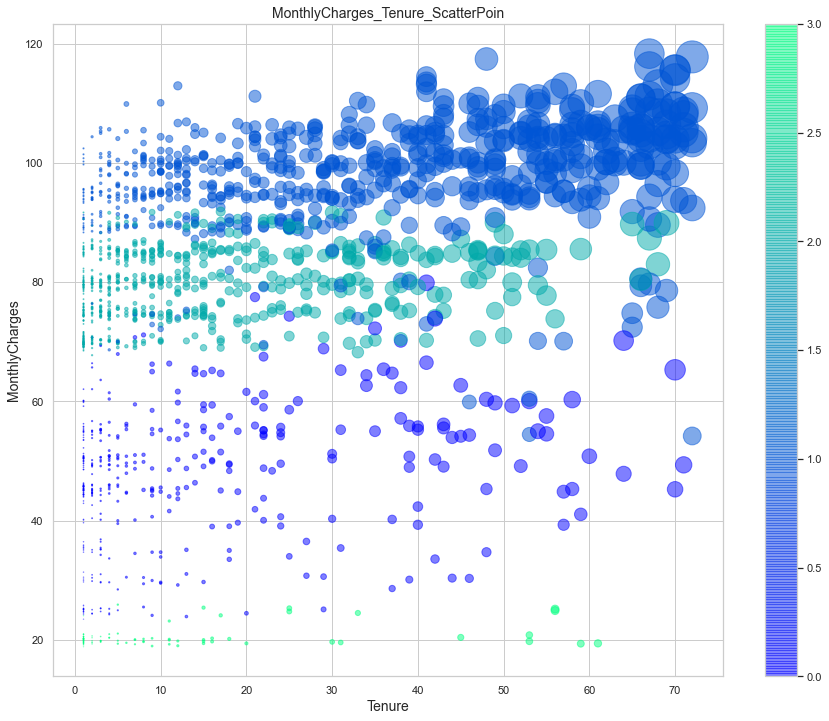

In [357]:
plt.figure(figsize=(15,12))
plt.scatter(cluster_result_SC['tenure'],cluster_result_SC['MonthlyCharges'],
           cmap = 'ma',
            alpha=0.5,
           c=cluster_result_SC['Category'],
            s=(cluster_result_SC['TotalCharges']/80)**1.48
           )
plt.colorbar()
plt.ylabel('MonthlyCharges',size=14)
plt.xlabel('Tenure',size=14)
plt.title('MonthlyCharges_Tenure_ScatterPoin',size=14)
plt.savefig('../charts/MonthlyCharges_Tenure_ScatterPoin.jpg',bbox_inches='tight');

## 训练分类器模型
+ 1. 解决数据集不平衡的问题
+ 2. 关注识别流失用户的准确率

### 数据集标准化/编码化

In [44]:
label_features=['gender','SeniorCitizen','Partner','Dependents',
                'PhoneService','MultipleLines',
                'InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
         'Contract','PaperlessBilling','PaymentMethod']

In [45]:
df_clf = telecom_cust[label_features+numeric_features]

In [46]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

trans_pipeline = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('str', OneHotEncoder(), label_features)
])

user_prepared_clf = trans_pipeline.fit_transform(df_clf)
str_columns = list(trans_pipeline.named_transformers_['str'].get_feature_names())
num_columns = list(numeric_features)
user_prepared_df_clf = pd.DataFrame(user_prepared_clf,columns=(num_columns+str_columns))

In [47]:
churn_label = telecom_cust['Churn']
churn_label = churn_label.apply(lambda x:1 if x=='Yes' else 0)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(user_prepared_df_clf,
                                                   churn_label,
                                                   test_size=0.2,
                                                   random_state=42)

In [48]:
def get_sample_weight(y):
    sample_0 = y.value_counts()[0]
    sample_1 = y.value_counts()[1]
    weight_0 = sample_1/(sample_0+sample_1)-0.15
    weight_1 = 1 - weight_0
    return y.apply(lambda x:weight_0 if x==0 else weight_1)

In [50]:
import lightgbm as lgb
lgb_clf = lgb.sklearn.LGBMClassifier(objective='binary',
                                     class_weight='balanced',
                                    random_state=42,)

In [51]:
lgb_clf.fit(x_train, y_train, eval_set=(x_test,y_test),
           eval_metric=['auc','logloss'],early_stopping_rounds=12,)

[1]	valid_0's auc: 0.815327	valid_0's binary_logloss: 0.659948
Training until validation scores don't improve for 12 rounds
[2]	valid_0's auc: 0.816265	valid_0's binary_logloss: 0.633212
[3]	valid_0's auc: 0.823513	valid_0's binary_logloss: 0.610959
[4]	valid_0's auc: 0.824314	valid_0's binary_logloss: 0.59277
[5]	valid_0's auc: 0.824368	valid_0's binary_logloss: 0.578423
[6]	valid_0's auc: 0.824834	valid_0's binary_logloss: 0.565684
[7]	valid_0's auc: 0.826796	valid_0's binary_logloss: 0.554582
[8]	valid_0's auc: 0.827895	valid_0's binary_logloss: 0.545843
[9]	valid_0's auc: 0.828176	valid_0's binary_logloss: 0.539057
[10]	valid_0's auc: 0.828944	valid_0's binary_logloss: 0.532971
[11]	valid_0's auc: 0.829137	valid_0's binary_logloss: 0.527372
[12]	valid_0's auc: 0.828793	valid_0's binary_logloss: 0.523098
[13]	valid_0's auc: 0.828665	valid_0's binary_logloss: 0.519663
[14]	valid_0's auc: 0.828597	valid_0's binary_logloss: 0.516285
[15]	valid_0's auc: 0.829921	valid_0's binary_logloss

LGBMClassifier(class_weight='balanced', objective='binary', random_state=42)

#### 验证一下Confusion Matrix查看查找流失用户的准确率

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1033
           1       0.50      0.76      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.74      0.75      1407



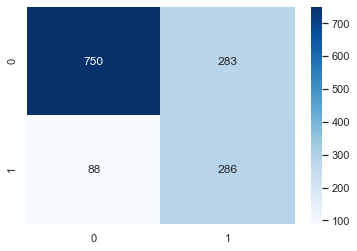

In [52]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,lgb_clf.predict(x_test)))
matrix = confusion_matrix(y_test, lgb_clf.predict(x_test))
sns.heatmap(matrix,annot=True,cmap='Blues',fmt='d')
plt.savefig('../charts/Confusion_matrix_LightGBM.jpg')

#### 获取importance Feature

In [53]:
lgb_clf_important_feature = pd.DataFrame({
    'column':lgb_clf.feature_name_,
    'importance': lgb_clf.feature_importances_,
}).sort_values(by='importance')

lgb_clf_important_feature=lgb_clf_important_feature.set_index('column')

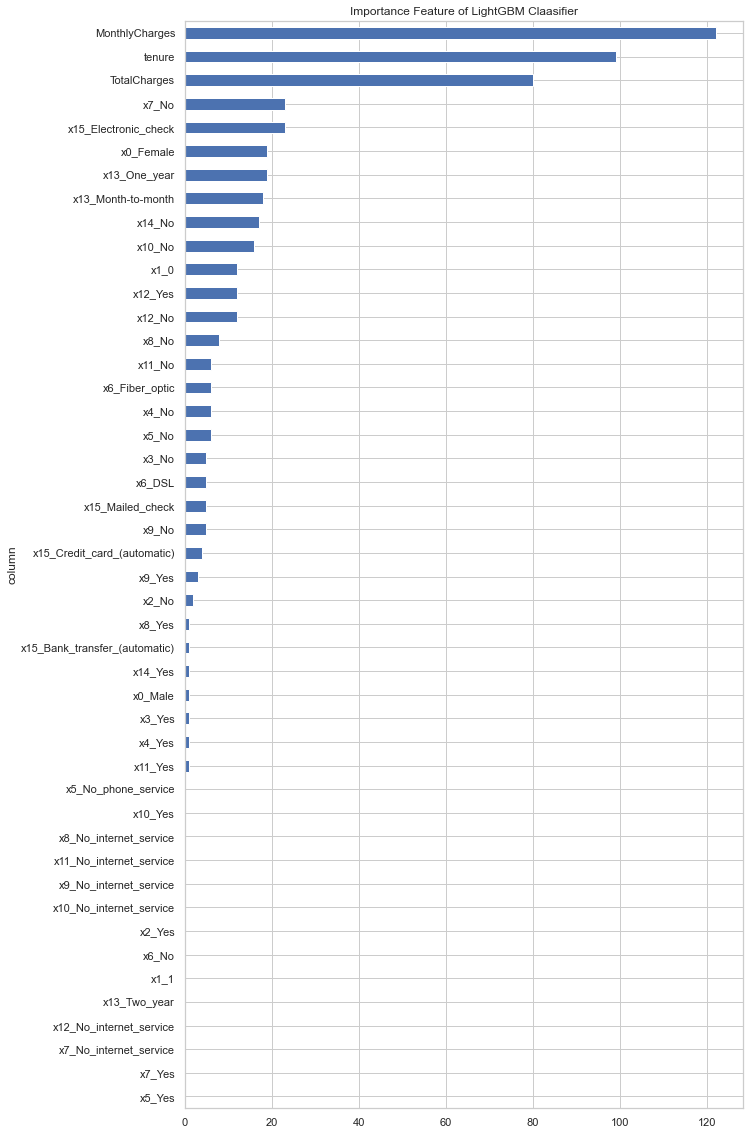

In [54]:
plt.figure(figsize=(10,20))
lgb_clf_important_feature['importance'].plot(kind='barh')
plt.title('Importance Feature of LightGBM Claasifier')
plt.savefig('../charts/Importance Feature of LightGBM Claasifier.jpg',bbox_inches='tight')